<a href="https://colab.research.google.com/github/jonahokiru/hello-world/blob/master/Moringa_Dsc14_Core_Machine_Week_7_IP_Jonah_Okiru_04_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Define the question

## a) specifying the question.

Study the factors that affect housing prices using the provided real estate dataset and then come up with a model that would enable the Hass consultant to predict the price for a house upon being provided with the predictor variables.

## b) The metric of success.

The model shoud be in position to predict the prices of the houses with accuracy score of 70%, upon being provided with the predictor variables.

## c) Understanding the contest.

Hass consultants is a real estate company in kenya that was estalished in the year 1992. The company deals with with the real estates business in major cities and towns across kenya. In arriving to the final price of the house Hass consultants takes several factors into considerations. some of these factors includes; number of bedrooms in a house, number of bathrooms in a house, numbers of floors of the house etc.

## d) Recording the experimental design.

Hypothesis: Predict the price the house is dependant upon on various factors.

X-axis: Number of bedrooms, number of bathrooms, square feet area of living area, square feet area of parking layout, number of floors, wether water front is there or not, number of views, grades, sqft above, square feet area of the basement, year the house was built, year the house is renovated, zip code of the house, latitude of the house, longitude of the house, sqft living 15 and sqft lot 15.

y-axis: The price of the house.

Experimental set-up: I hpothesize the price of the house based on the variables stated in the X-axis.

Design of the experiment: Analyze the price of 20,000 houses and the factors it depends on.

sample size: 20,000 houses.

# 2. Reading the data.

## a) Import the libraries.

In [152]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV
from numpy import arange
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols




## b) Loading the data.

In [153]:
# loading the data using pandas data frame.
house_data=pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')

## c) Checking the data.

In [154]:
#Check the number of records in the dataset
house_data.shape

(21613, 20)

In [155]:
#Preview the top of the dataset
house_data.head(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [156]:
#Preview the bottom of the dataset
house_data.tail(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [157]:
#Columns datatypes
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

All the columns have appropriate data type.

In [158]:
# Check for the availlabe columns
house_data.columns


Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

# 3. External data validation.

## a) Validation [Hass consultant house prices](https://www.hassconsult.com/buycommercial)

# 4. Tidying the dataset

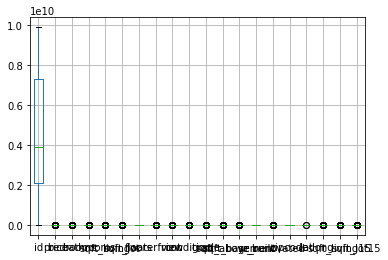

In [159]:
#Check the outliers
house_data.boxplot()


There are no outliers in the data.

In [160]:
#Check the missing data
house_data.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

The data has no any missin values.

In [161]:
#Futher data cleaning procedures.
#Drop the id columns since, it doesn't plays any role in determing the price of a house.
house_data.drop(['id'], axis=1, inplace=True)


# 5. Exploratory analysis

## a) bivariate and multivariate visualization of the variables.

## (i) Bivariate Visualization

In [162]:
#plot the bivariate summarries between the depedent variable and indepedent variables.
#preview the dataset
house_data.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


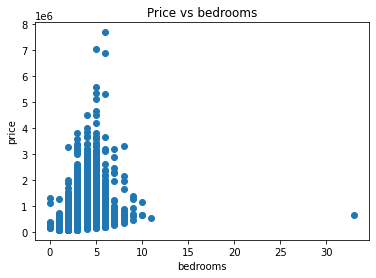

In [163]:
#Visualization of the relationship between price and bedrooms
plt.scatter(house_data['bedrooms'], house_data['price'])
plt.title('Price vs bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.show()

From the above visualization there's aweak positive correlation between the price and bedrooms.

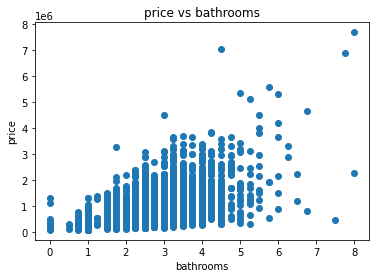

In [164]:
#Visualization of the relationship between price and bedrooms
plt.scatter(house_data['bathrooms'], house_data['price'])
plt.title('price vs bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.show()

From the visuals above there's clearly a moderate positive correlation between the price and the bathrooms of the house.

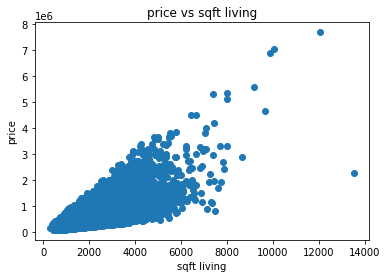

In [165]:
#Visualization of the relationship between price and sqft living
plt.scatter(house_data['sqft_living'], house_data['price'])
plt.title('price vs sqft living')
plt.xlabel('sqft living')
plt.ylabel('price')
plt.show()

From the visuals above there's a moderate correlation between the price and sqft living.

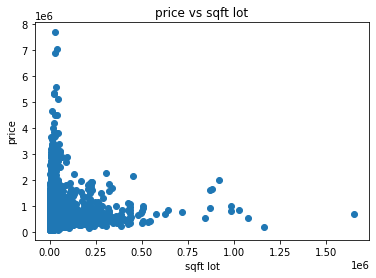

In [166]:
#Visualization of the relationship between price and sqft lot
plt.scatter(house_data['sqft_lot'], house_data['price'])
plt.title('price vs sqft lot')
plt.xlabel('sqft lot')
plt.ylabel('price')
plt.show()

The visuals above indicates the correlation between the price and sqft lot is positive weak correllation.

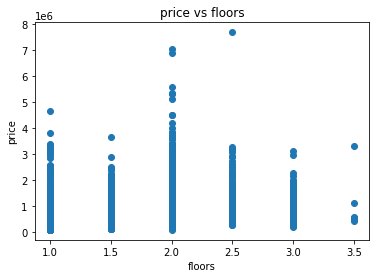

In [167]:
#Visualization of the relationship between price and floors
plt.scatter(house_data['floors'], house_data['price'])
plt.title('price vs floors')
plt.xlabel('floors')
plt.ylabel('price')
plt.show()

The visuals above indivcates there is no correlation between the price floors. 

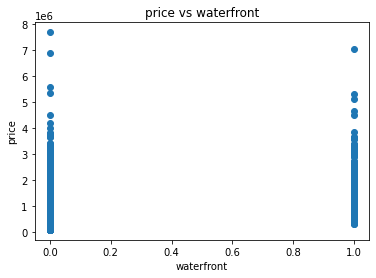

In [168]:
#Visualization of the relationship between price and waterfront
plt.scatter(house_data['waterfront'], house_data['price'])
plt.title('price vs waterfront')
plt.xlabel('waterfront')
plt.ylabel('price')
plt.show()

The visuals above indicates there's no correlation price and waterfront.

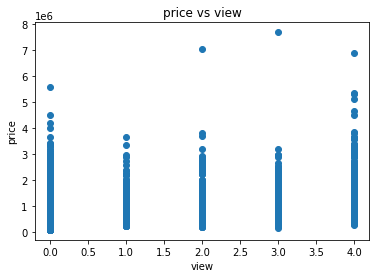

In [169]:
#Visualization of the relationship between price and view
plt.scatter(house_data['view'], house_data['price'])
plt.title('price vs view')
plt.xlabel('view')
plt.ylabel('price')
plt.show()

The visuals above indicates there's no correlation price and view.

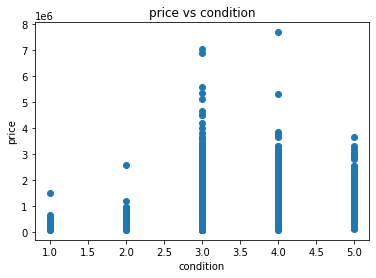

In [170]:
#Visualization of the relationship between price and condition
plt.scatter(house_data['condition'], house_data['price'])
plt.title('price vs condition')
plt.xlabel('condition')
plt.ylabel('price')
plt.show()

The visuals above indicates there's no correlation price and condition.

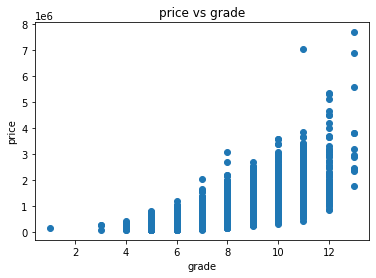

In [171]:
#Visualization of the relationship between price and grade
plt.scatter(house_data['grade'], house_data['price'])
plt.title('price vs grade')
plt.xlabel('grade')
plt.ylabel('price')
plt.show()

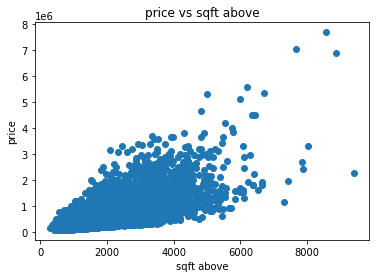

In [172]:
#Visualization of the relationship between price and sqft above
plt.scatter(house_data['sqft_above'], house_data['price'])
plt.title('price vs sqft above')
plt.xlabel('sqft above')
plt.ylabel('price')
plt.show()

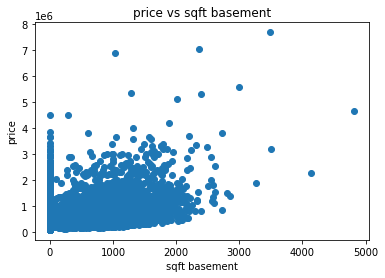

In [173]:
#Visualization of the relationship between price and sqft basement
plt.scatter(house_data['sqft_basement'], house_data['price'])
plt.title('price vs sqft basement')
plt.xlabel('sqft basement')
plt.ylabel('price')
plt.show()

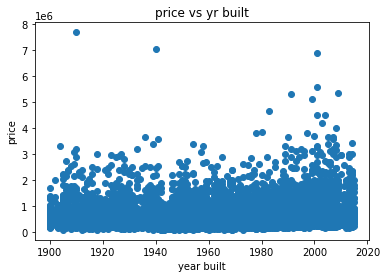

In [174]:
#Visualization of the relationship between price and yr built
plt.scatter(house_data['yr_built'], house_data['price'])
plt.title('price vs yr built')
plt.xlabel('year built')
plt.ylabel('price')
plt.show()

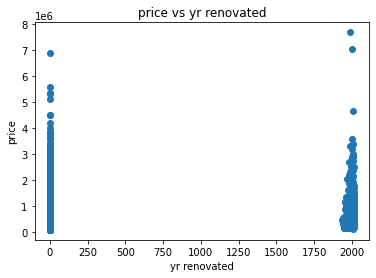

In [175]:
#Visualization of the relationship between price and yr renovated
plt.scatter(house_data['yr_renovated'], house_data['price'])
plt.title('price vs yr renovated')
plt.xlabel('yr renovated')
plt.ylabel('price')
plt.show()

The visuals above indicates there's no correlation price and yr renovated.

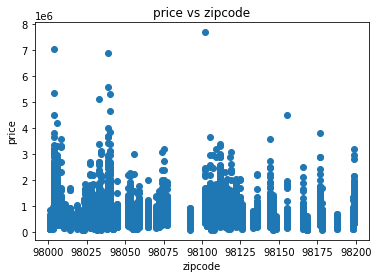

In [176]:
#Visualization of the relationship between price and zipcode
plt.scatter(house_data['zipcode'], house_data['price'])
plt.title('price vs zipcode')
plt.xlabel('zipcode')
plt.ylabel('price')
plt.show()

The visuals above indicates there's no correlation price and zipcode

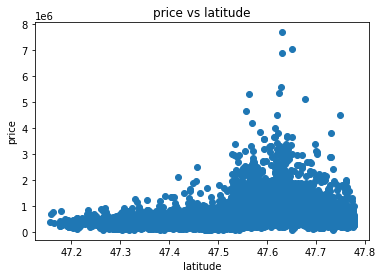

In [177]:
#Visualization of the relationship between price and latitude
plt.scatter(house_data['lat'], house_data['price'])
plt.title('price vs latitude')
plt.xlabel('latitude')
plt.ylabel('price')
plt.show()

The visuals above indicates there's aweak positive correlation between the price and the latitude.

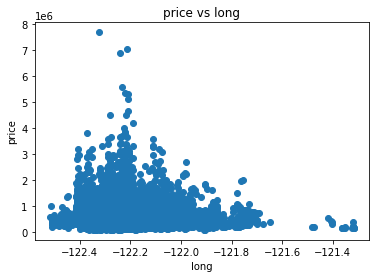

In [178]:
#Visualization of the relationship between price and longitude
plt.scatter(house_data['long'], house_data['price'])
plt.title('price vs long')
plt.xlabel('long')
plt.ylabel('price')
plt.show()

The visuals above indicates there's aweak positive correlation between the price and the longitude.

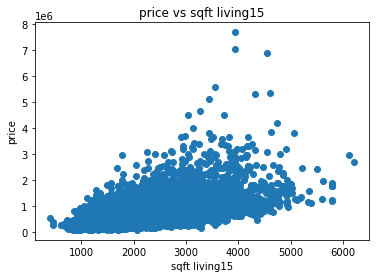

In [179]:
#Visualization of the relationship between price and sqft living15
plt.scatter(house_data['sqft_living15'], house_data['price'])
plt.title('price vs sqft living15')
plt.xlabel('sqft living15')
plt.ylabel('price')
plt.show()

The visuals above indicates there's aweak positive correlation between the price and the sqft living15.

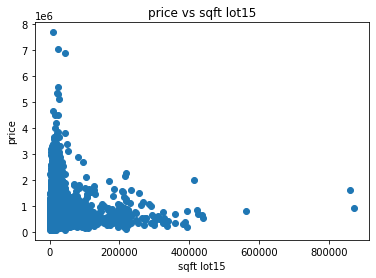

In [180]:
#Visualization of the relationship between price and sqft lot15
plt.scatter(house_data['sqft_lot15'], house_data['price'])
plt.title('price vs sqft lot15')
plt.xlabel('sqft lot15')
plt.ylabel('price')
plt.show()

The visuals above indicates there's aweak positive correlation between the price and the lots..

## (ii) Multivariate Visualization

### Principal component analysis(PCA)

In [181]:
#Seperate the predictor and response variables
X= house_data.drop(['price'], axis=1).values
y=house_data['price'].values

In [182]:
#split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [183]:
#Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [184]:
#Apply PCA.
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [185]:
#Explained variance
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.29018425, 0.12299014])

Together, the first two principal components contain 41.32% of the information. The first principal component contains 29.02% of the variance and the second principal component contains 12.30% of the variance. The third and fourth principal component contained the rest of the variance of the dataset.

In [186]:
#Training 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)



RandomForestClassifier(max_depth=2, random_state=0)

In [187]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [188]:
#Performance evaluation
#performance evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.011566042100393246


From the Pca analysis the accuracy achieved with two components is 1.16% which is very low. 

# 6. Implementing the solution.

## a) Multiple linear regression

In [189]:
#Describe the data
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


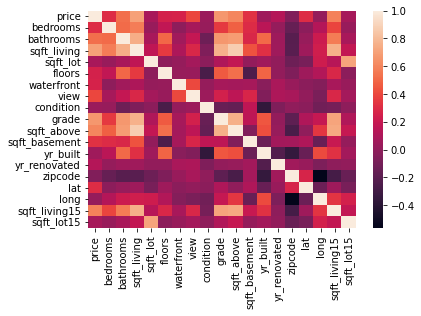

In [190]:
#check for the multiclollinearity
import seaborn as sns
sns.heatmap(house_data.corr())

From the heatmap above there exist multicollinearity in the following predictor variables; sqft living15, sqft above, bathrooms, longitude, zipcode, grade, bathrooms, sqft living, sqft lot. Therefore these features will not be used in the building of predictive model.

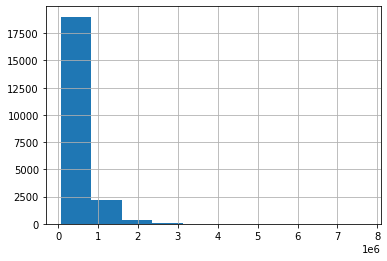

In [191]:
#Check if the target variables is continous
house_data['price'].hist()

From the visualizations above, we can clearly conclude that the target variable is continous.

In [192]:
#splitting the data into response variable and predictor variable
X=house_data.drop(['sqft_living15', 'sqft_above', 'bathrooms', 'long', 'grade', 'zipcode',
                   'price', 'sqft_living', 'sqft_lot'], axis=1)
y= house_data['price']

In [193]:
#split the dataset into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20, random_state=0)

In [194]:
#Applying the linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [195]:
#Lets check the coefficients the regession model has chiisel
regressor.coef_

array([6.98388461e+04, 1.78987438e+05, 6.31789722e+05, 1.17598048e+05,
       3.66639753e+04, 1.76095966e+02, 1.75081373e+02, 6.25523596e+01,
       7.38175855e+05, 1.02443957e+00])

In [196]:
#The variance score
print('Variance score: {}'.format(regressor.score(X_test, y_test)))

Variance score: 0.4046490709440619


The variance score of 0.405 implies that the pridictors variable differs from the response variable by 40.5% which is clear indication our model is not doing well interms of predicting the reponse variable.

In [197]:
#Make the prediction using the model
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values
# 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
17384,297000.0,723900.570540
722,1580000.0,695348.500908
2680,562100.0,358005.518565
18754,631500.0,333698.705811
14554,780000.0,970795.517796
...,...,...
5427,844000.0,707905.080795
16547,335500.0,474994.189783
4585,369950.0,585611.597238
17762,300000.0,369586.846228


In [198]:
#Evaluate the alogarithim
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 166266.47852555985
Mean Squared Error: 70897316070.02092
Root Mean Squared Error: 266265.49921088334


From the output, we will see that the value of root mean squared error is 266265.49921088334, which is more than 10% of the mean value of the percentages of all the students i.e. 5.401822e+05	. This means that our algorithm isn't doing well.

In [199]:
#Residual plots
#fitting the linear regression model

res_model=ols('price~ floors + waterfront + view + condition + sqft_basement + yr_built + yr_renovated + lat + sqft_lot15 ', data=house_data).fit()
#display the res model summary
print(res_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     1622.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        06:29:04   Log-Likelihood:            -3.0204e+05
No. Observations:               21613   AIC:                         6.041e+05
Df Residuals:                   21603   BIC:                         6.042e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.544e+07    7.4e+05    -47.866

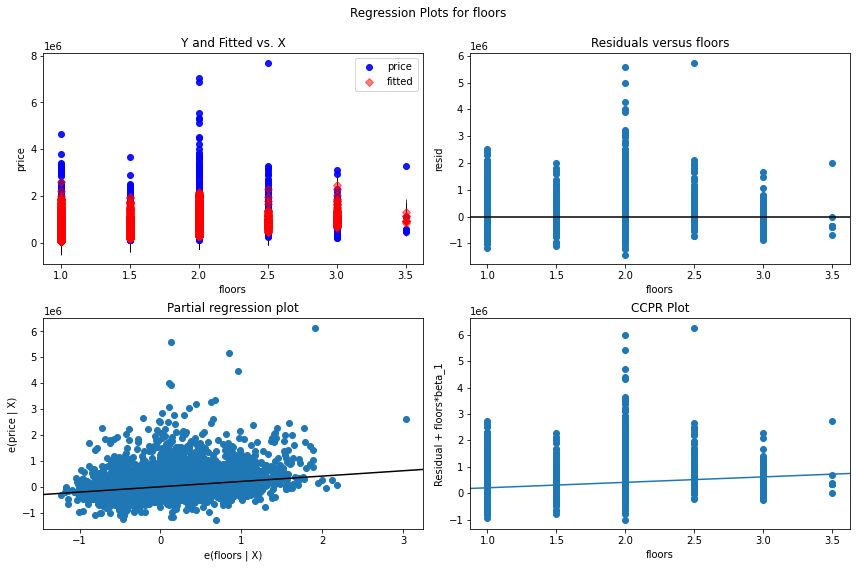

In [200]:
#Display the plots of res model vs X floors.
#create residual vs. predictor plot for 'assists'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(res_model, 'floors', fig=fig)

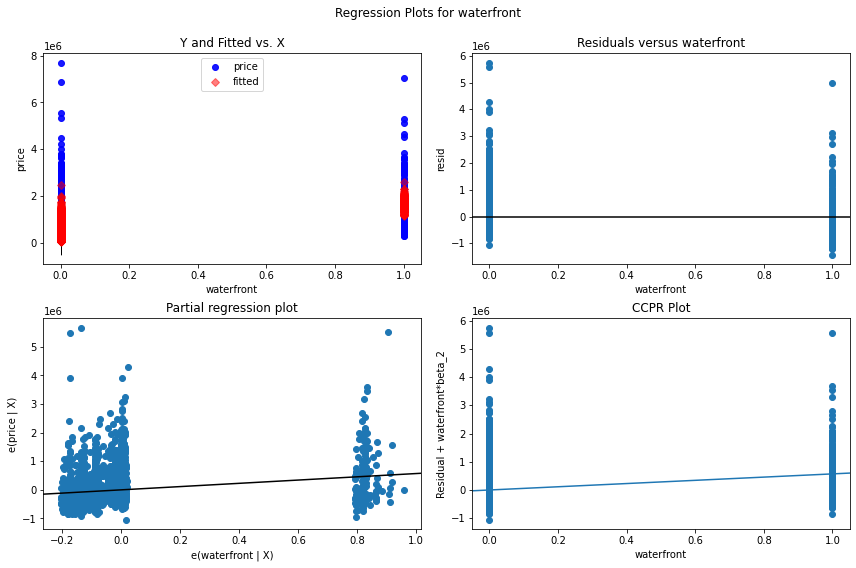

In [201]:
#Display the plots of res model vs X waterfront.
#create residual vs. predictor plot for 'assists'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(res_model, 'waterfront', fig=fig)

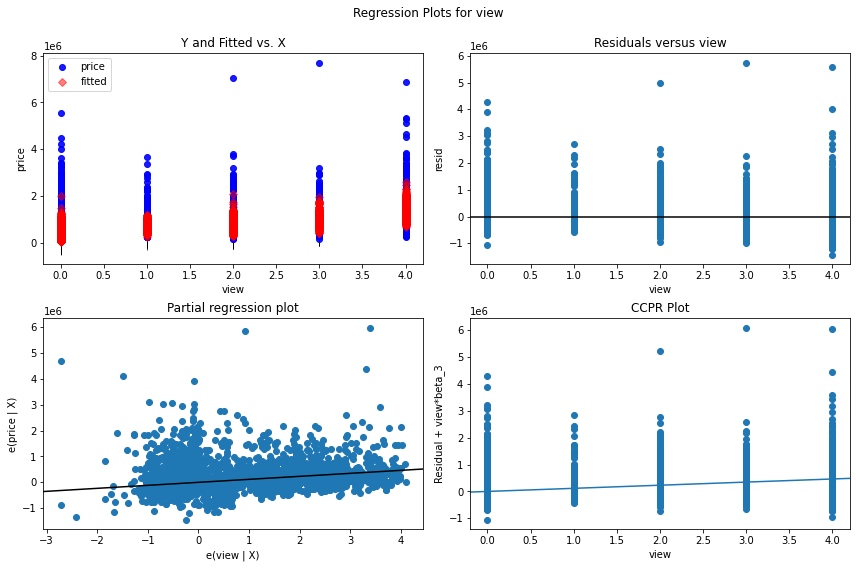

In [202]:
#Display the plots of res model vs predictor view.
#create residual vs. predictor plot for 'view'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(res_model, 'view', fig=fig)

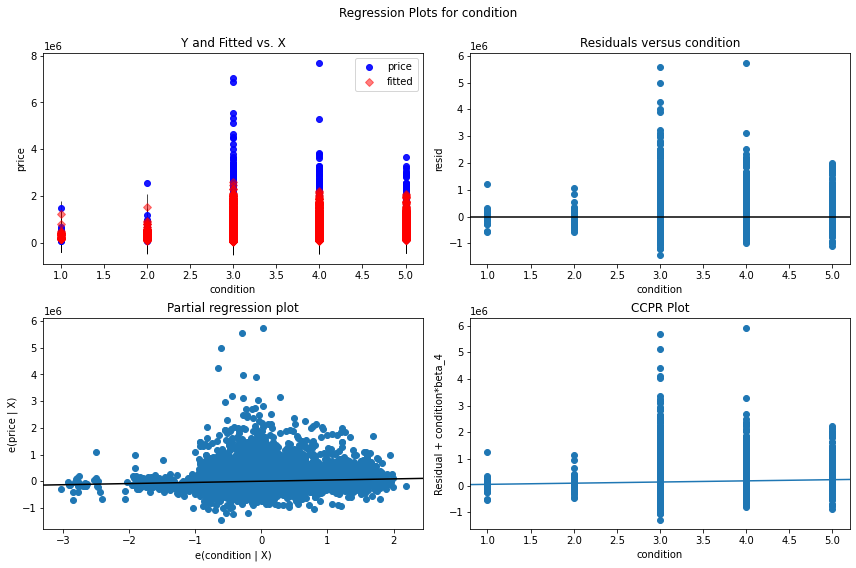

In [203]:
#Display the plots of res model vs condition.
#create residual vs. predictor plot for condition
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(res_model, 'condition', fig=fig)

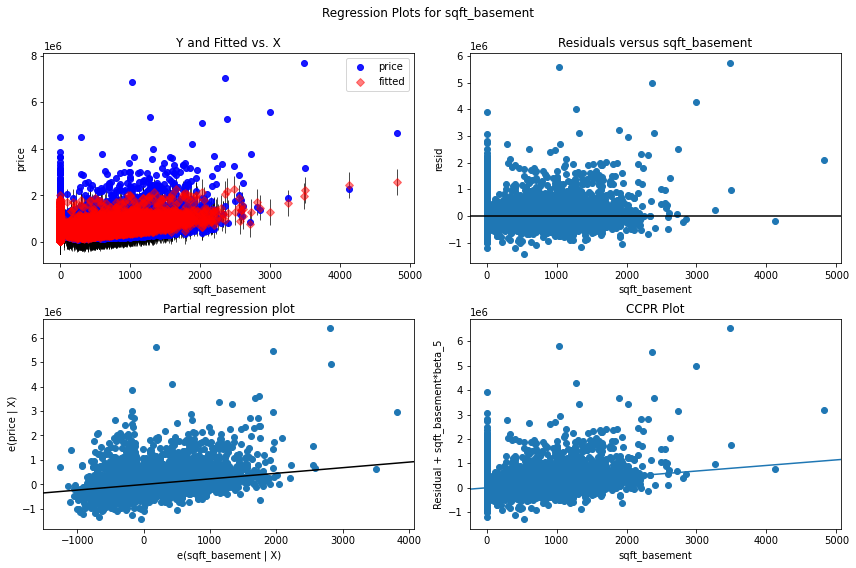

In [204]:
#Display the plots of res model vs sqft basement.
#create residual vs. predictor plot for 'sqft basement'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(res_model, 'sqft_basement', fig=fig)

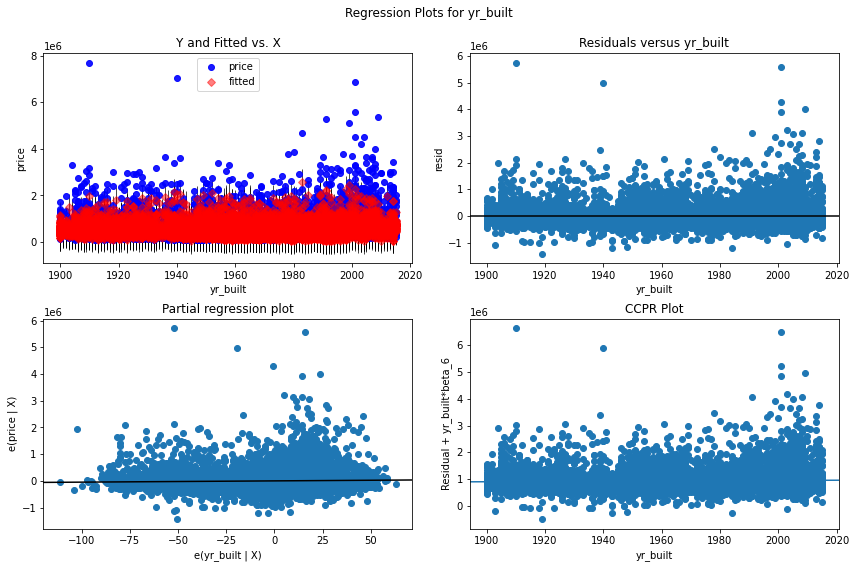

In [205]:
#Display the plots of res model vs year built.
#create residual vs. predictor plot for year built
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(res_model, 'yr_built', fig=fig)

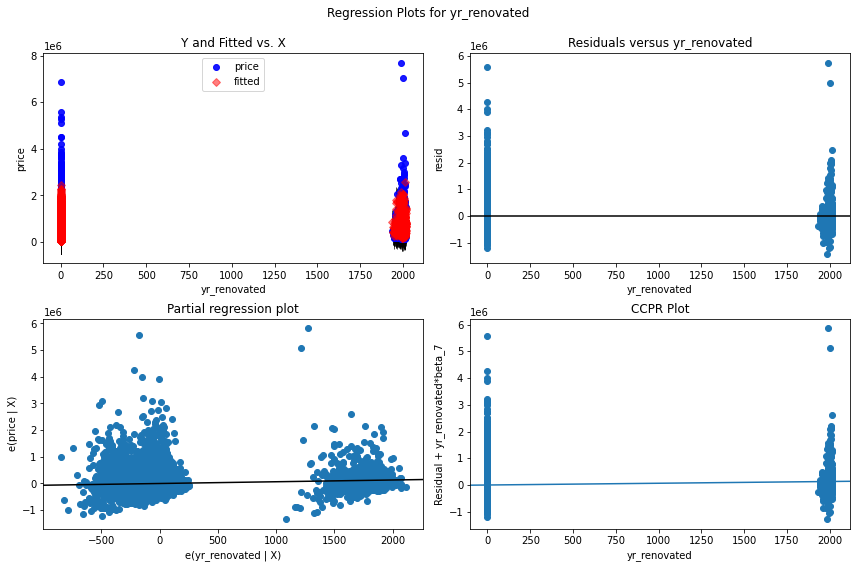

In [206]:
#Display the plots of res model vs year renovated.
#create residual vs. predictor plot for year renovated
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(res_model, 'yr_renovated', fig=fig)

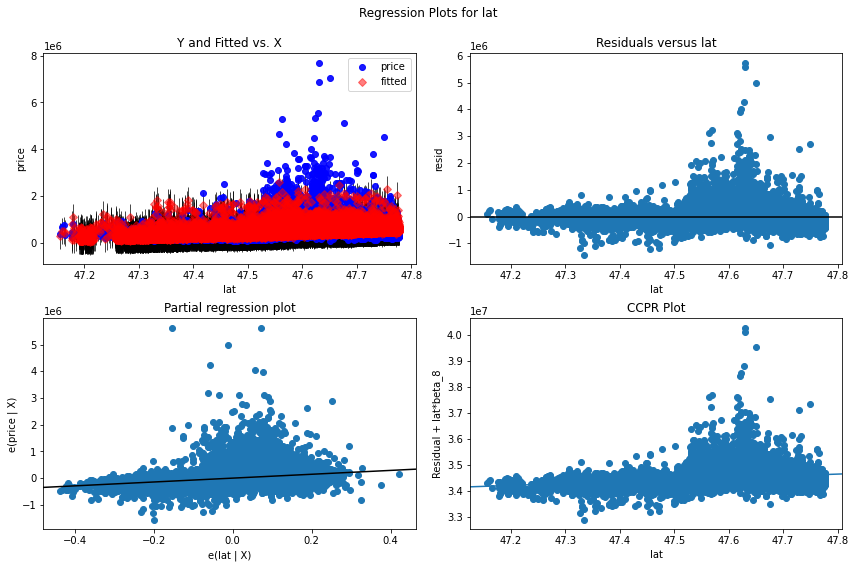

In [207]:
#Display the plots of res model vs latitudes.
#create residual vs. predictor plot for latitudes
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(res_model, 'lat', fig=fig)

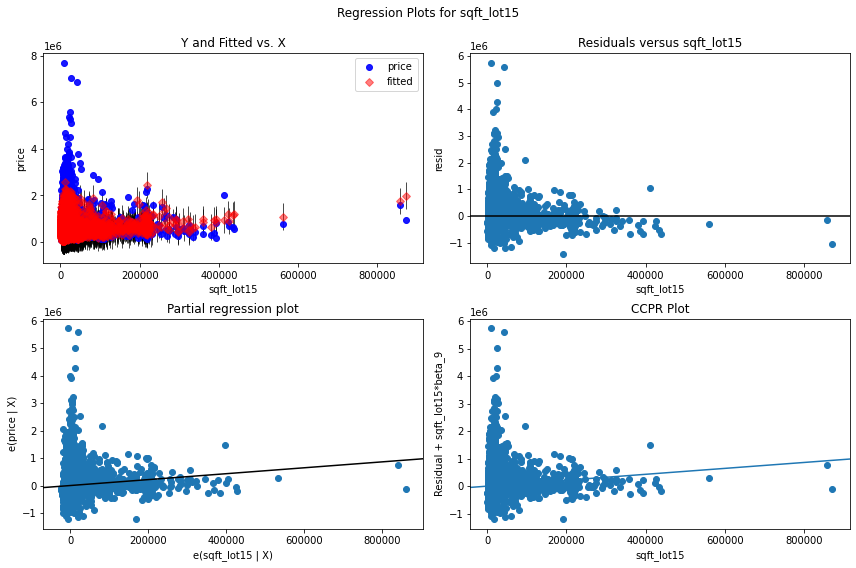

In [208]:
#Display the plots of res model vs sqft lot15.
#create residual vs. predictor plot for sqft lot15
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(res_model, 'sqft_lot15', fig=fig)

In both plots the residuals appear to be randomly scattered around zero, which is an indication that heteroscedasticity is not a problem with either of the predictors variable in the model.

## Bartlett tests


Ho: H0: The variance among  predictors is equal.

HA: At least one group has a variance that is not equal to the rest.

Conclusion.

Since from the residual plots aboves we have found that there's no heteroscedasticity , hence we accept the Null hypothesis H0 and reject the alternative hypothesis HA . At the 95 % level of confindence there's evidence that there is no signifance difference in the variance of the predictors.



## b) Quantile regression.

In [209]:
#Describe the data
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [210]:
#The quantile regression using the stats models
#find the conditional regression coefficients for the conditioned mean,0.5 quantile
#Deifine the quantiles variables

import statsmodels.formula.api as smf

mod = smf.quantreg('y ~ X', house_data)
mod_res = mod.fit(q=.5)

#Display the summary of the model

print(mod_res.summary())


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2685
Model:                       QuantReg   Bandwidth:                   2.709e+04
Method:                 Least Squares   Sparsity:                    3.509e+05
Date:                Sun, 24 Apr 2022   No. Observations:                21613
Time:                        06:29:24   Df Residuals:                    21602
                                        Df Model:                           10
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.295e+07   4.58e+05    -50.120      0.000   -2.38e+07   -2.21e+07
X[0]        5.028e+04   1411.782     35.617      0.000    4.75e+04    5.31e+04
X[1]        1.507e+05   2745.554     54.898      0.000    1.45e+05    1.56e+05
X[2]        4.829e+05   1.51e+04     31.952      0.0

From the summary of the quantile regressions above the intercept is -2.295e+07 which is a bit far from the mean price which is 5.401822e+05	. These implies at 0.5 percentile the model isn't doing well in predicting the reponse varaiables.

### c) Ridge regression.

In [211]:
#Define the response and predictors variables
X_1= house_data.drop(['price'], axis=1)
y_1=house_data['price']

In [212]:
#Create the baseline model, the model with no regularization
regression = LinearRegression()
regression.fit(X_1,y_1)
base_model = (mean_squared_error(y_true=y_1,y_pred=regression.predict(X_1)))
print(base_model)


40518022074.275925


In [213]:
#The ridge model , the model with regularization
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [214]:
#determine which set of alpha to use  using .best_params_
search.fit(X,y)
search.best_params_
# {'alpha': 0.01}
# abs(search.best_score_)
#The best_params_ 

{'alpha': 0.01}

The the best set of alpha to use is {'alpha': 0.01}.

In [215]:
#The best possible mean square error
#{'alpha': 0.01}
abs(search.best_score_)

77809489217.36513

The possible mean squared error is 77809489217.36513, which is greater than than the base model indicating the model isn't performing well.

In [216]:
#Fit the model with the ridge information and determine the mean squarred error with the normalization.
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X_1,y_1)
ridge_model = (mean_squared_error(y_true=y_1,y_pred=ridge.predict(X_1)))
print(ridge_model)

40524344765.439


40524344765.439 is lower than the previous result of the best score this is beacuse the prevoius results of the best score was not cross validated. Even after the cross validation we still get 40524344765.439 which is still slightly higher than the baseline results which is 40518022074.275925. This indicates the ridge model isn't still not doing well in predicting the response variable, even after validation.

In [217]:
#The coefficients of each base model and regression model
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X_1.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline


{'bathrooms': 41166.76100968799,
 'bedrooms': -35797.78526878027,
 'condition': 26412.954334727685,
 'floors': 6695.157538716981,
 'grade': 95985.79230523002,
 'lat': 602825.2080907875,
 'long': -214960.62365184783,
 'sqft_above': 70.82712642204363,
 'sqft_basement': 39.68676095797481,
 'sqft_living': 110.51388750604916,
 'sqft_living15': 21.67584906828925,
 'sqft_lot': 0.12840424994483035,
 'sqft_lot15': -0.3824610304036469,
 'view': 52934.07499962661,
 'waterfront': 583016.9475137593,
 'yr_built': -2622.410499457613,
 'yr_renovated': 19.824180497913297,
 'zipcode': -582.5716677591586}

## d) Lasso regration.

In [218]:

#Define the response and predictors variables
X2= house_data.drop(['price'], axis=1)
y2=house_data['price']

In [219]:
#Scalling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X2)
X2= scaler.transform(X2)

In [220]:
# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [221]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch.
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

In [222]:
#Fitting the lasso model
gridlasso.fit(X2_train, y2_train) 
linear.fit(X2_train, y2_train)

LinearRegression()

In [223]:
#print the best parameters, R-squared scores, MSE, and coefficients
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X2_test, y2_test))
print("linear score:", linear.score(X2_test, y2_test)) 
print("lasso MSE:", mean_squared_error(y2_test, gridlasso.predict(X2_test)))
print("linear MSE:", mean_squared_error(y2_test, linear.predict(X2_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 20.0}
lasso score: 0.709737266449461
linear score: 0.7097371661736289
lasso MSE: 41207692537.709816
linear MSE: 41207706773.55611
lasso best estimator coef: [-34399.26702209  27826.88444502 213844.83375544   5845.12153666
   6144.15539399  47879.09903978  39684.71760347  18935.3878054
 113135.72205796 -43001.50020408 -37181.52068471 -76980.27224601
   7040.26792609 -31409.30061759  83481.79136105 -30551.83911637
  16660.95954141  -9750.52732037]
linear coef: [-34424.53431839  27957.40583739  81485.85675279   5907.38589433
   6148.95398688  47893.17781724  39683.13024123  18956.70853482
 113082.92867187  76207.216416    26511.74127583 -77017.70465605
   7054.14554193 -31459.79907513  83510.25030616 -30601.42184926
  16779.87752303  -9804.1759509 ]


The MSE of the lasso model 41207692537.709816 which is slightly lower than the MSE of the linear model which is 41207706773.55611. This is due to lasso model have undergo regularization through cross validations. hence making it to have a lower MSE compared to the lasso model. Furthermore the MSE of the lasso model above is still higher than the MSE of the basemodel. These indicates the lasso model isn't doing well when comes to predicting the repose variable.



## e) Elastic net regression


In [224]:
# define the predictor and response variables
X3= house_data.drop(['price'], axis=1)
y3=house_data['price']

In [225]:
#Elastic net model
elastic=ElasticNet(normalize=True)
search_1=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),
                                                  'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)


In [226]:
#Fit the elastic model
search_1.fit(X3,y3)


GridSearchCV(cv=10, estimator=ElasticNet(normalize=True), n_jobs=1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8]},
             scoring='neg_mean_squared_error')

In [227]:
#get the best parm of the model
search_1.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.8}

In [228]:
#Best score for the model
abs(search_1.best_score_)

41058369186.64148

In [229]:
#predict the response variable using the values from best param_
elastic=ElasticNet(normalize=True,alpha= 1e-05,l1_ratio=0.80)
elastic.fit(X3,y3)
elastic_model=(mean_squared_error(y_true=y3,y_pred=elastic.predict(X3)))
print(elastic_model)

40618690340.85009


The MSE of the elastic net model 40618690340.85009 which is slightly lower than the MSE of the linear model which is 41207706773.55611. This is due to elastic net model have undergo regularization through cross validations by L1 and L2 loss function. hence making it to have a lower MSE compared to the base model. Furthermore the MSE of the elastic net model above is lower comapred to all models aboves. These implies that the elastic net model is doing slightly well in the prediction of the response variables compared to all other models discussed above.



# 7. Challenging the solution.

All the regression models used to predict the price of the house , didn't achieve the the set accuracy score of 70%.

## 9. Follow up Question

## a) Did we have the right data

Yes, the data was well structured interms of the features and the response variables to be used in the building of the machine learning models.

## b) Do we need another data to answer the question

No, the data had all the information needed to answer the question.

## c) Did we have the right question.

Yes, the question was right.